Breast Cancer Prediction

In [259]:
#importing necessary libraries
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

import seaborn as sb
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [193]:
df=pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


prerequisites:-
Diagnosis column -

0 = B -> Benign : this indicate non cancerous cells.(Cancer Absent) 

1 = M -> Malignant : this indicates cancerous cells.(Cancer present)



In [194]:
df["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [195]:
#In the previous output we can see there are 357 cancer detected patients
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [196]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [197]:
df.shape #dimensions

(569, 6)

In [198]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [163]:
#no null values

In [235]:
df.drop_duplicates(inplace = True)
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


Data Visualisation

In [236]:
df["diagnosis"].value_counts()
#sb.countplot(df["diagnosis"])

diagnosis
1    357
0    212
Name: count, dtype: int64

Text(0.5, 1.0, 'count of cancer classified patients')

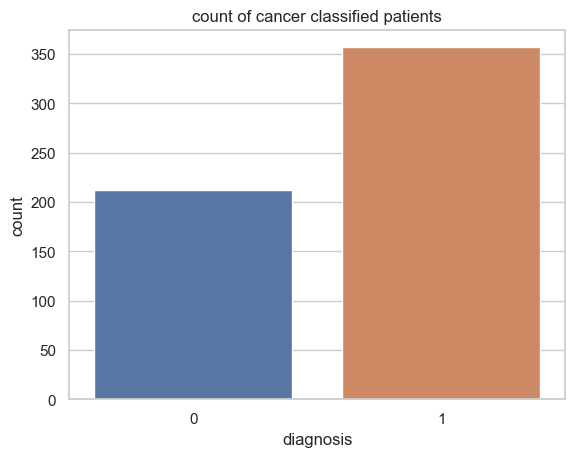

In [237]:
sb.countplot(x="diagnosis", data=df, order=[0, 1])
plt.title("count of cancer classified patients")


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


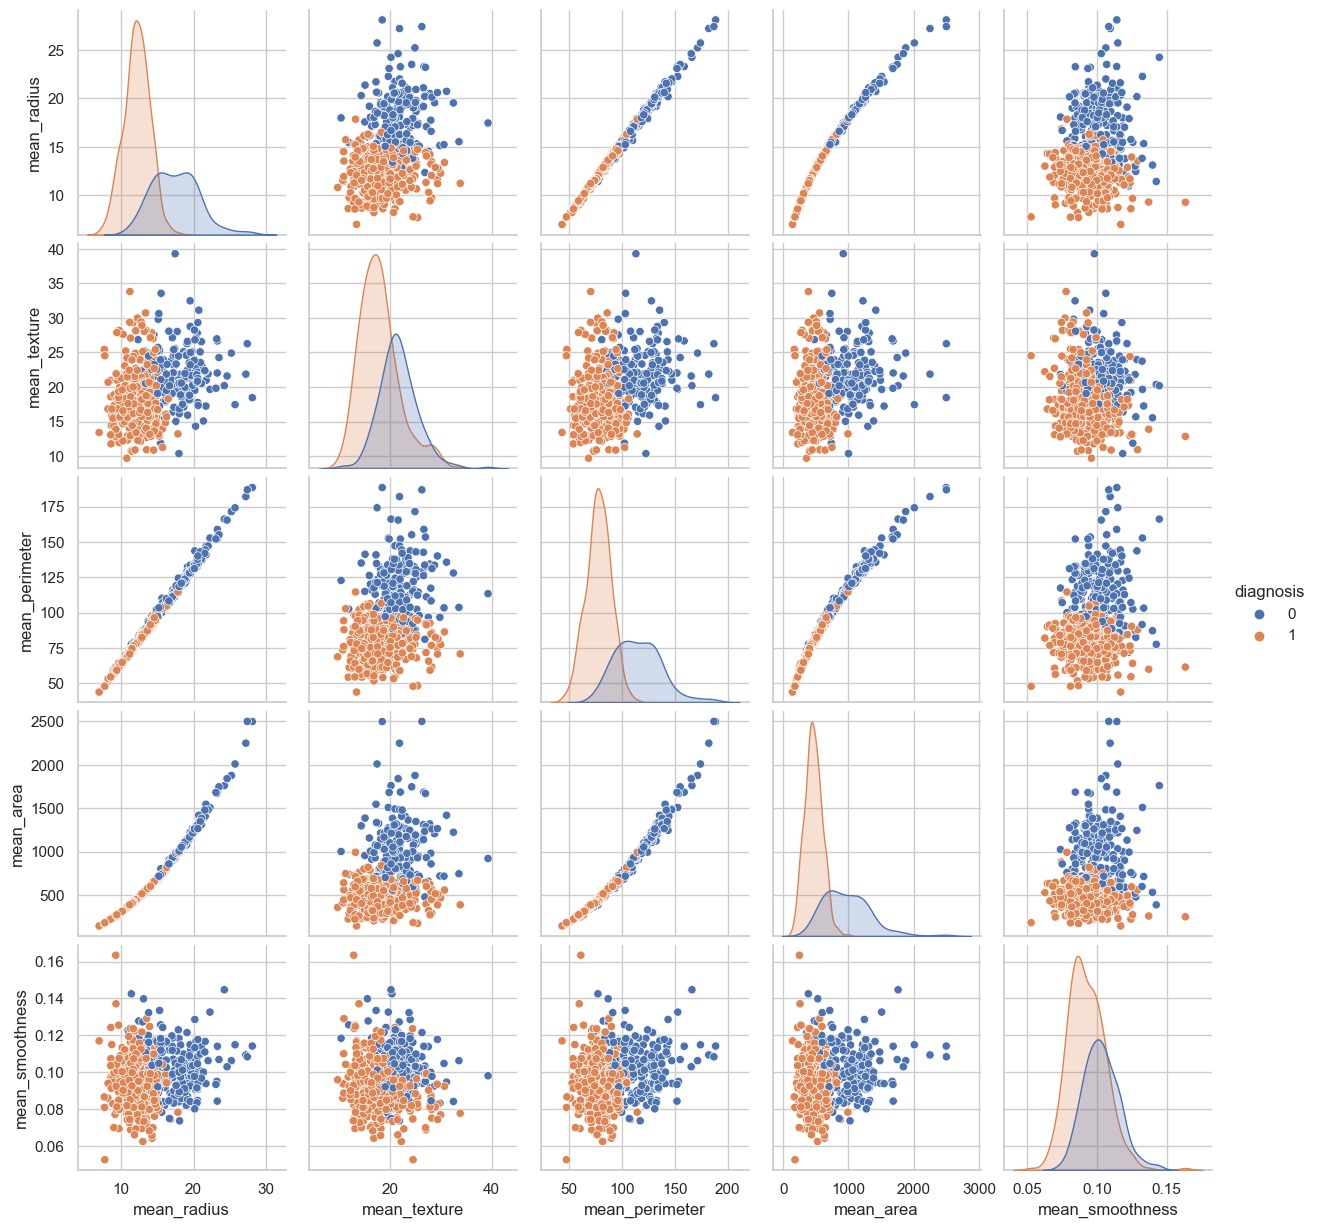

In [238]:
sb.pairplot(df.iloc[:,:],hue="diagnosis")

In [239]:
df.iloc[:,:].corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

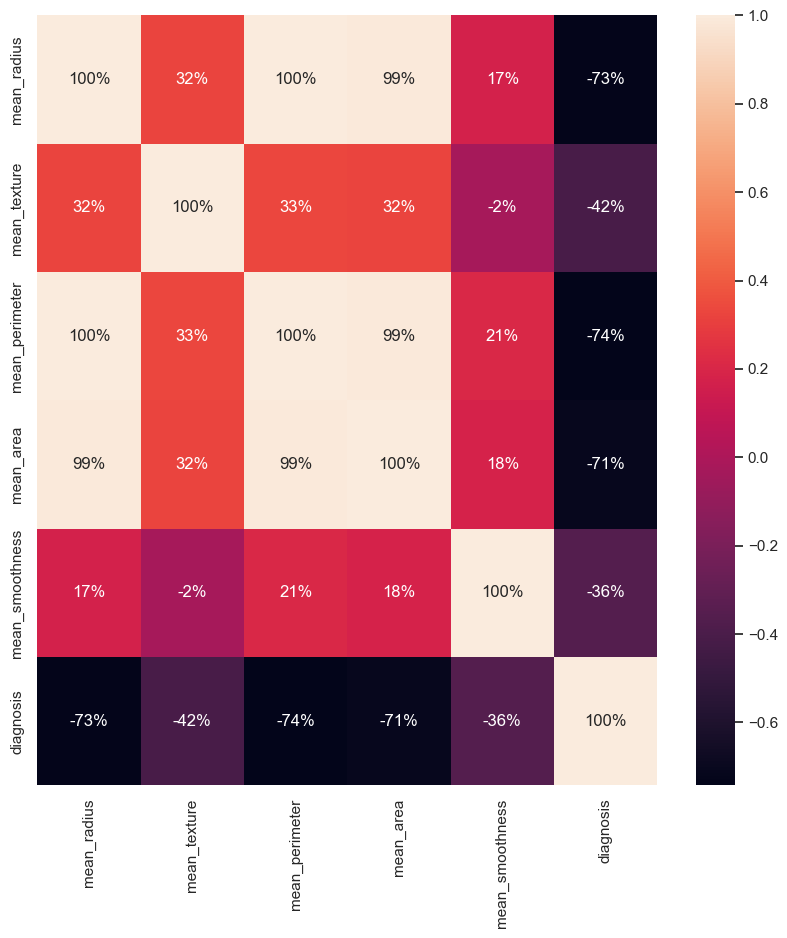

In [240]:
plt.figure(figsize=(10,10))
sb.heatmap(df.iloc[:,:].corr(),annot=True,fmt=".0%")

In [241]:
#using heatmap to visualise the correlation representing through %ages


Splitting the dataset into training and testing 

In [242]:
df.shape


(569, 6)

In [247]:
fds = df.drop(columns = ['mean_perimeter', 'mean_area'], axis = 1)
fds

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


In [248]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [250]:
X


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02]])

In [251]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [254]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [255]:
#Normalizing features
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [260]:
#we use various ML models like logistic regression,Decision Tree and Random Forest and finally choose the model with highest accuracy
def models(X_train,Y_train):
        
        #log reg
        
        logreg=LogisticRegression(random_state=0)
        logreg.fit(X_train,Y_train)
         
        
        #Rand for
    
        randfor=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
        randfor.fit(X_train,Y_train)
        
        print("Accuracy of various models: ")
        print('Logistic regression: ',logreg.score(X_train,Y_train))
        print('Random forest:',randfor.score(X_train,Y_train))
        
        return logreg,randfor
        

In [261]:
model=models(X_train,Y_train)

Accuracy of various models: 
Logistic regression:  0.9340659340659341
Random forest: 0.9956043956043956


Models Testing

In [270]:
for i in range(len(model)):
    
    print(model[i])
    print(classification_report(Y_test,model[i].predict(X_test)))
    print("Accuracy", accuracy_score(Y_test,model[i].predict(X_test)))
    print()
    print()

LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.94      0.97      0.96        67

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114

Accuracy 0.9473684210526315


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.91      0.96      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy 0.9210526315789473




In [271]:
#Best model is Logistic Regression with accuracy 94.73684%

In [273]:
#using log reg to make predictions
pred=model[0].predict(X_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(Y_test)

Predicted values:
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 1]
Actual values:
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]
